### 1. MLP

In [2]:
# Import library
import h5py
import numpy as np
import matplotlib.pyplot as plt 
import json

# Load pre-trained network

# File name
Data_fName = 'mnist_network_params.hdf5'

# Read data
with h5py.File(Data_fName, 'r+') as df:
    W1 = df['W1'][:]
    W2 = df['W2'][:]
    W3 = df['W3'][:]
    b1 = df['b1'][:]
    b2 = df['b2'][:]
    b3 = df['b3'][:]

a) Verify the dimension of each numpy array with the shape property.

In [3]:
# Verify the dimension of each parameters

print('Dimension of W1 =', W1.shape)
print('Dimension of b1 =', b1.shape)
print('Dimension of W2 =', W2.shape)
print('Dimension of b2 =', b2.shape)
print('Dimension of W3 =', W3.shape)
print('Dimension of b3 =', b3.shape)


Dimension of W1 = (200, 784)
Dimension of b1 = (200,)
Dimension of W2 = (100, 200)
Dimension of b2 = (100,)
Dimension of W3 = (10, 100)
Dimension of b3 = (10,)


b) Extract image files

In [4]:
# File name
Data_fName = 'mnist_testdata.hdf5'

# Read data
with h5py.File(Data_fName, 'r+') as df:
    xdata = df['xdata'][:]
    ydata = df['ydata'][:]


c) Write functions to calculate ReLU and softmax

In [4]:
# softmax function
def softmax(data):
    z = np.exp(data)
    return z / z.sum(axis = 0)

# ReLU function
def ReLU(data):
    f = np.maximum(0,data)
    return f

d) Creat an MLP to classify 784-dimensional images into the target 10-dimensional output.

In [5]:
output = np.zeros((len(xdata),10))

for i in range(len(xdata)):
    # First layer
    a1 = ReLU(np.dot(W1,xdata[i])+b1)

    # Second layer
    a2 = ReLU(np.dot(W2,a1)+b2)

    # Output layer
    output[i,:] = softmax(np.dot(W3,a2)+b3)

# data
data = []

for i in range(9990,9999):
    data += [{"Index": int(i), "Activations": output[i,:].tolist(), "Classification": int(np.argmax(output[i,:]))}]

# Write to .json
with open("result.json", "w") as f:
    f.write(json.dumps(data))

e) Compare the prediction with the true label.

In [6]:
result = (np.argmax(output, axis=1) == np.argmax(ydata, axis=1)).sum()
print("Number of correctly classified images:", result)

Number of correctly classified images: 9790


f) Visual inspection

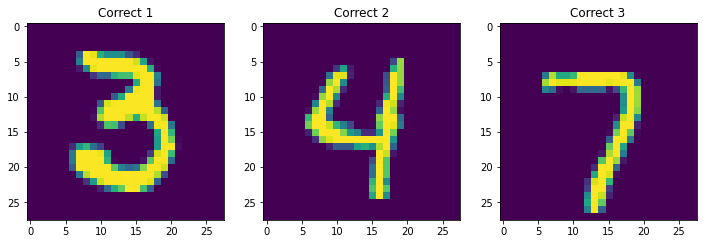

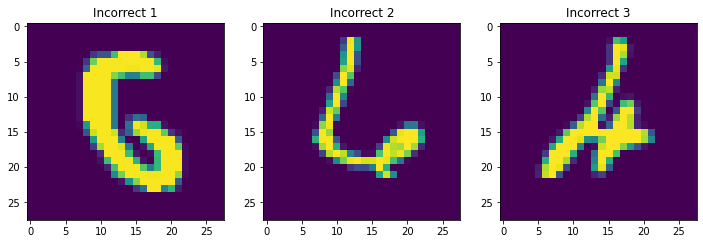

In [13]:
result = (np.argmax(output, axis=1) == np.argmax(ydata, axis=1))

# Find correct and incorrect index
idx_cor = np.where(result == True)[0]
idx_incor = np.where(result == False)[0]

# Randomly select 3 data from correct and incorrect
select_cor = np.random.choice(idx_cor, 3, replace = False)
select_incor = np.random.choice(idx_incor, 3, replace = False)

fig = plt.figure(figsize = (12,4))

x = fig.add_subplot(131)  
x.imshow(xdata[select_cor[0]].reshape(28,28))
plt.title("Correct 1")

x = fig.add_subplot(132)   
x.imshow(xdata[select_cor[1]].reshape(28,28))
plt.title("Correct 2")

x = fig.add_subplot(133)  
x.imshow(xdata[select_cor[2]].reshape(28,28))
plt.title("Correct 3")
plt.show()

fig = plt.figure(figsize = (12,4))

x = fig.add_subplot(131)  
x.imshow(xdata[select_incor[0]].reshape(28,28))
plt.title("Incorrect 1")

x = fig.add_subplot(132)   
x.imshow(xdata[select_incor[1]].reshape(28,28))
plt.title("Incorrect 2")

x = fig.add_subplot(133)  
x.imshow(xdata[select_incor[2]].reshape(28,28))
plt.title("Incorrect 3")
plt.show()

Some of the incorrectly classified images were obvious but some were hard to distinguish.